In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
data_dir = os.path.join(parent_dir, "data")

In [3]:
df_emotion = pd.read_csv(os.path.join(data_dir, "combined_emo_3comments_10_300.csv"))

In [4]:
df_emotion = df_emotion[df_emotion["emotion"] != "neutral"]

# Normalize Artist

In [5]:
artist_emotion_percentage = (
    df_emotion.groupby(["channel", "emotion"])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
)

In [6]:
for emotion in df_emotion["emotion"].unique():
    plt.figure(figsize=(16, 9), dpi=400)
    sns.barplot(
        data=artist_emotion_percentage.reset_index().sort_values(
            by=emotion, ascending=False
        ),
        x=emotion,
        y="channel",
        hue="channel",
        palette="magma_r",
    )

    plt.title(f"Emotional Score for {emotion.capitalize()} by Artist")
    plt.xlabel("Emotion Percentage")
    plt.ylabel("Artist")

    plt.savefig(
        os.path.join(
            data_dir, "emotion", f"emotion_plot_{emotion}_normalized_artist.png"
        ),
        bbox_inches="tight",
    )
    plt.close()

# Emotional Analysis for subset of artists and emotions

In [7]:
desired_emotions = ["sadness", "love", "admiration", "fear", "remorse"]

desired_artists = [
    "raycharles",
    "bach",
    "kanye_west",
    "anthrax",
    "billie_eilish",
    "pinkfloyd",
]

In [8]:
artist_emotion_percentage[desired_emotions].loc[desired_artists]

emotion,sadness,love,admiration,fear,remorse
channel,,,,,
raycharles,0.122047,0.157480,0.358268,0.000000,0.007874
bach,0.025641,0.137607,0.321368,0.003419,0.007692
kanye_west,0.059316,0.116606,0.261924,0.012431,0.010877
anthrax,0.028242,0.160432,0.362709,0.005323,0.012716
billie_eilish,0.067804,0.270714,0.284547,0.005806,0.007669
pinkfloyd,0.090001,0.126497,0.291900,0.005882,0.011339


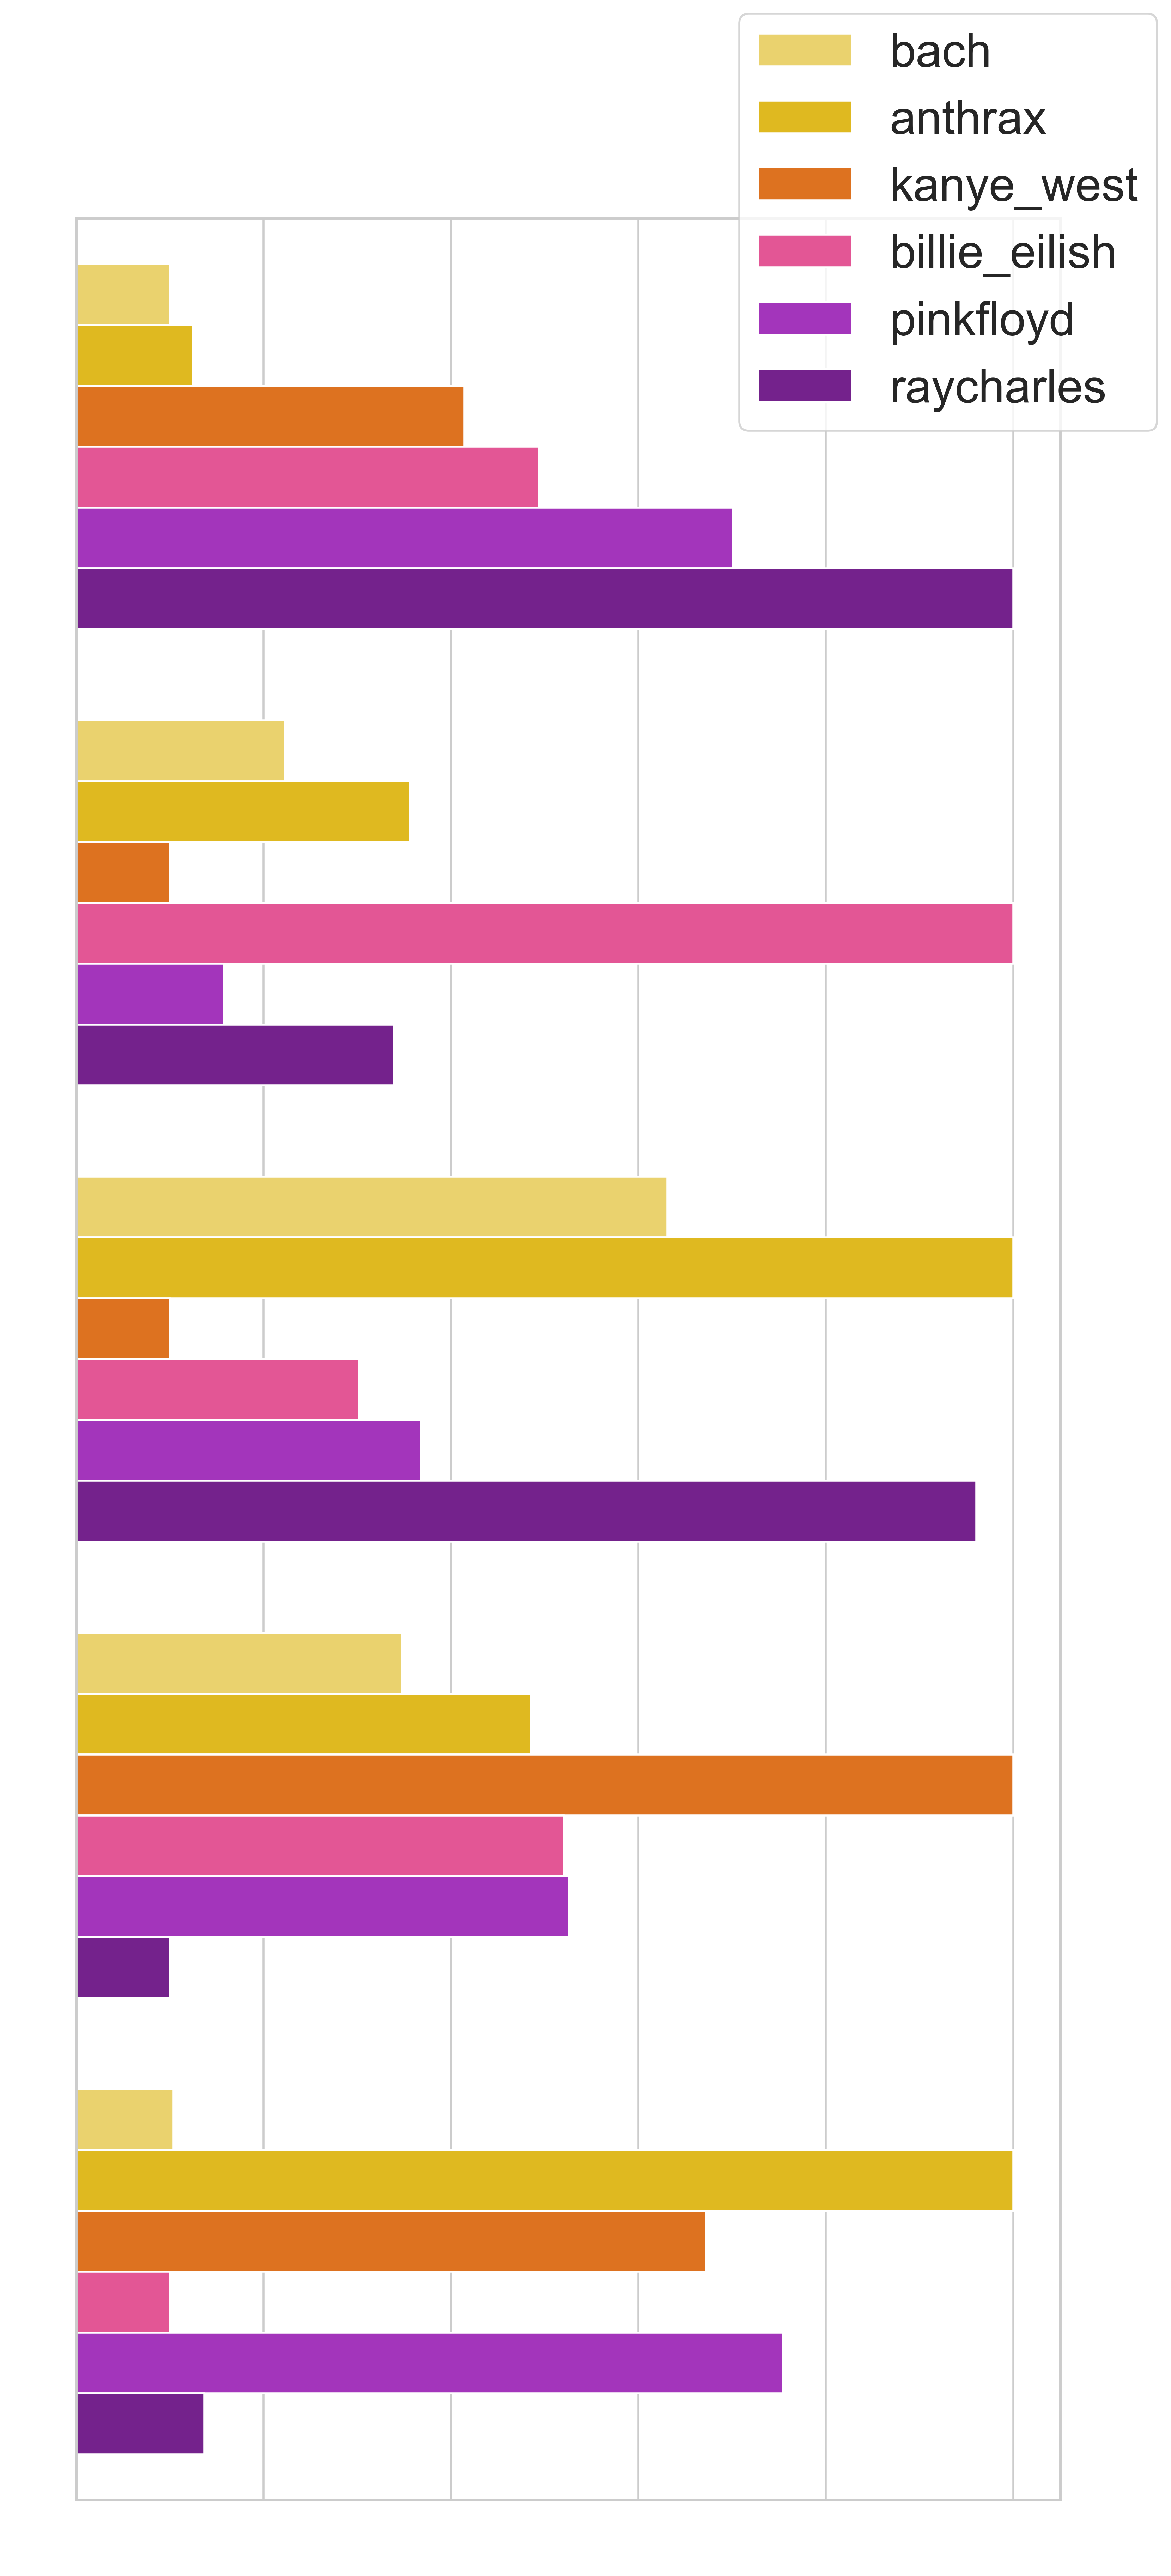

In [9]:
scaler = MinMaxScaler(
    feature_range=(0.1, 1.0)
)  # when set to 0.0, bar not visible on graph

df_emotion_subset = artist_emotion_percentage[desired_emotions].loc[desired_artists]
df_emotion_sorted = df_emotion_subset.sort_values(
    by="sadness", ascending=True
)  # sort the first emotion visible
df_emotion_scaled = pd.DataFrame(
    scaler.fit_transform(df_emotion_sorted),
    columns=df_emotion_sorted.columns,
    index=df_emotion_sorted.index,
)  # needs scaling for visual purposes
df_emotion_melted = df_emotion_scaled.reset_index().melt(
    id_vars="channel", var_name="emotion", value_name="intensity"
)

palette = ["#ffde59", "#ffcc00", "#fc6e00", "#fb3e93", "#b21fd1", "#7d109e"]

plt.figure(figsize=(9, 21), dpi=400)

sns.set(style="whitegrid")
sns.barplot(
    x="intensity", y="emotion", hue="channel", data=df_emotion_melted, palette=palette
)

plt.xlabel("")
plt.ylabel("")

plt.xticks(fontsize=24, color="white")
plt.yticks(rotation=270, fontsize=24, color="white")

plt.legend(fontsize=24, bbox_to_anchor=(0.65, 1.1))

plt.savefig(
    os.path.join(data_dir, "emotion", "emotion_artist_subset.png"), transparent=True
)

plt.show()